In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd

url = 'https://raw.githubusercontent.com/shubhendra7/mall-customers-dataset/main/Mall_Customers.csv'
df = pd.read_csv(url)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


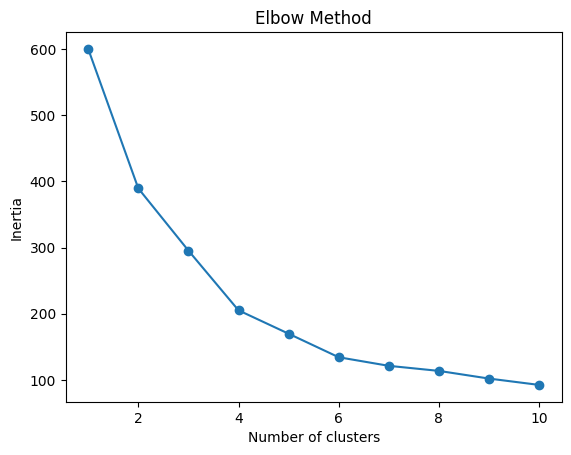

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_df)
df['Cluster'] = clusters


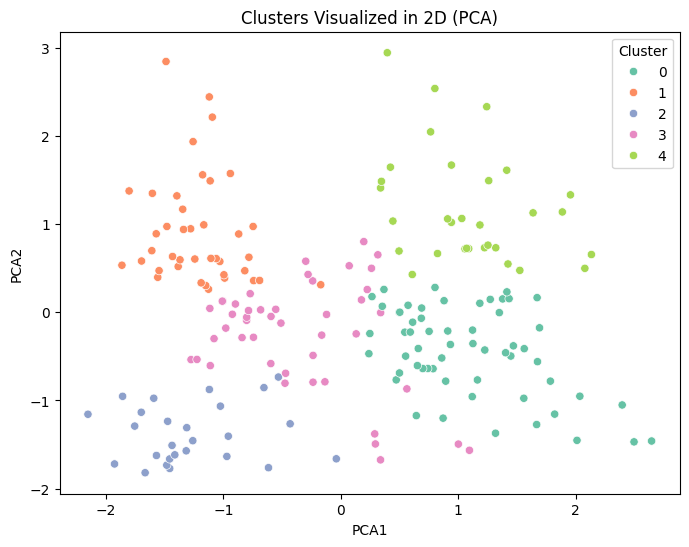

In [11]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_df)
df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df)
plt.title('Clusters Visualized in 2D (PCA)')
plt.show()


In [12]:
score = silhouette_score(scaled_df, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.40846873777345605
